# Introducción a Python y Ejemplo de Simulación

__Imprimir texto__

In [37]:
print("Hola, Soy Martín y estoy probando un script para el curso de Investigación Operativa 2018 los dias miércoles noche en UTN FRBA.")

Hola, Soy Martín y estoy probando un script para el curso de Investigación Operativa 2018 los dias miércoles noche en UTN FRBA.


__Suma y Multiplicación__

Hacemos una suma y multiplicación de prueba.

In [38]:
(5+3)*10

80

__Prueba de simulación con distribución Exponencial__

Lo que buscaremos es simular tiempos entre arribos con una distribución exponencial dada una media mu.

Importamos librerías de utilidad como Numpy, Matplotlib, etc

In [39]:
import random
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as py

Cargamos los parámetros iniciales, como la tasa de eventos por unidad de tiempo. En este caso se encontrará en la variable mu y su valor será = 5. Queremos que nuestro algoritmo realice 100 iteraciones, es decir 100 corridas de simulación.

In [40]:
mu = 5
beta = 1/mu
iteraciones = 100

Creamos una función llamada __t_arribos__ donde tendra como entrada el valor de la media de la función (representada como mu) y el valor de "r" (que será una función de probabilidad aleatoria uniforme entre 0 y 1)

In [41]:
def t_arribos (media, r):
    tiempo = - (1/media)* np.log(r)
    return tiempo

Creamos un vector llamado __tiempos__, inicialmente lleno de ceros y cuya longitud será la cantidad de iteraciones que realizaremos, es decir 100.

In [42]:
tiempos = np.zeros(iteraciones)

Realizamos una acción __for__ de 100 iteraciones (entre 0 y 100), donde en cada iteración ejecutamos la función __t_arribos__. A dicha función ingresará la media mu y un número aleatorio entre 0 y 1. El resultado de cada iteración será guardado en cada posición del vector __tiempos__.

In [43]:
for t in range(0,iteraciones):
    tiempos[t] = t_arribos(mu,1-((random.uniform(0.001, 0.999))))

Utilizando la librería MatPlotLib, importada como "plt", visualizamos el valor de cada posición del vector __tiempos__. Es decir, visualizamos en un grafico de barras el tiempo entre arribos con la media mu.

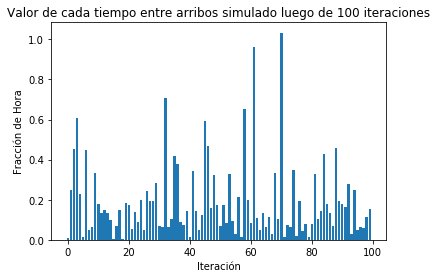

In [44]:
plt.bar(range(0,iteraciones),tiempos)
plt.title('Valor de cada tiempo entre arribos simulado luego de ' + str(iteraciones) + ' iteraciones')
plt.ylabel('Fracción de Hora')
plt.xlabel('Iteración')
plt.show()

Si desean visualizar por consola los valores del vector __tiempos__ simplemente deben escribir su nombre en una caja de código y presionar "Shift" + "Enter"

In [45]:
tiempos

array([ 0.01112685,  0.2487106 ,  0.45345872,  0.60560638,  0.22617299,
        0.01544234,  0.45030756,  0.05045852,  0.06581847,  0.33156724,
        0.17701075,  0.13163315,  0.14663457,  0.13619603,  0.09913715,
        0.00345183,  0.06643896,  0.14888674,  0.00458876,  0.18517355,
        0.17161525,  0.05183548,  0.13854962,  0.09084289,  0.19702609,
        0.0502346 ,  0.24468314,  0.19511081,  0.19568081,  0.28409785,
        0.06998827,  0.06172249,  0.70934262,  0.06627906,  0.10598537,
        0.41752237,  0.37961906,  0.0899035 ,  0.07564336,  0.14196018,
        0.01240328,  0.34240725,  0.14251112,  0.04714209,  0.12555158,
        0.59078259,  0.46741209,  0.15796434,  0.32568113,  0.17574418,
        0.07080669,  0.17146782,  0.08545528,  0.32849226,  0.09244725,
        0.02941276,  0.21385377,  0.01482209,  0.65398816,  0.19744594,
        0.08350402,  0.95991626,  0.10664655,  0.04754593,  0.13484901,
        0.06575592,  0.11242812,  0.02898085,  0.33458813,  0.10

Ahora calcularemos el tiempo acumulado del vector tiempo de arribos. Lo que queremos es que el tiempo acumulado de arribos nos ayude a calcular la cantidad de arribos por hora.

In [46]:
t_acumulado = np.zeros(iteraciones)
t_acumulado[0] = tiempos[0]

Para eso creamos el vector __t_acumulado__, de dimensión "iteraciones". Luego con un loop "for" de "y" iteraciones vamos acumulando los tiempos simulados anteriormente.

In [47]:
for y in range(1,iteraciones):
    t_acumulado[y] = tiempos[y]+t_acumulado[y-1]

Si queremos visualizar por consola el valor del vector __t_acumulado__ entonces escribimos el nombre del vector en la caja de código y ejecutamos dicha caja con "Shift" + "Enter".

In [48]:
t_acumulado

array([  1.11268481e-02,   2.59837450e-01,   7.13296174e-01,
         1.31890255e+00,   1.54507554e+00,   1.56051788e+00,
         2.01082545e+00,   2.06128396e+00,   2.12710243e+00,
         2.45866967e+00,   2.63568042e+00,   2.76731357e+00,
         2.91394814e+00,   3.05014417e+00,   3.14928131e+00,
         3.15273314e+00,   3.21917210e+00,   3.36805884e+00,
         3.37264760e+00,   3.55782115e+00,   3.72943640e+00,
         3.78127188e+00,   3.91982150e+00,   4.01066439e+00,
         4.20769048e+00,   4.25792507e+00,   4.50260821e+00,
         4.69771902e+00,   4.89339983e+00,   5.17749768e+00,
         5.24748595e+00,   5.30920843e+00,   6.01855105e+00,
         6.08483012e+00,   6.19081549e+00,   6.60833786e+00,
         6.98795692e+00,   7.07786042e+00,   7.15350378e+00,
         7.29546396e+00,   7.30786724e+00,   7.65027448e+00,
         7.79278561e+00,   7.83992769e+00,   7.96547927e+00,
         8.55626186e+00,   9.02367395e+00,   9.18163829e+00,
         9.50731942e+00,

Ahora procederemos a visualizar el vector __t_acumulado__

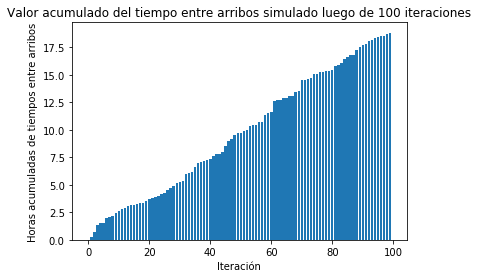

In [49]:
plt.bar(range(0,iteraciones),t_acumulado)
plt.title('Valor acumulado del tiempo entre arribos simulado luego de ' + str(iteraciones) + ' iteraciones')
plt.ylabel('Horas acumuladas de tiempos entre arribos')
plt.xlabel('Iteración')
plt.show()

Ahora utilizaremos el vector de tiempos acumulados __t_acumulado__ para calcular cuantos arribos hubo por hora

In [50]:
# creamos vector arribos_horas de longitud 12 (por que justo queremos ver lo que sucede las primeras 12 horas).
# inicialmente el vector horas esta todo en ceros.
horas = 15
arribos_horas = np.zeros(horas)

# creamos el vector horas_count para ir contando hora a hora cuantos arribos hubo.
horas_count = 1

# realizamos un loop hora a hora
for u in range(0,np.shape(arribos_horas)[0]): 
    
    # por cada hora iterada, vemos cuantas iteraciones de tiempo acumulado cayeron en la hora analizada
    for g in range(0,iteraciones):
        
        # en cada hora contaremos la cantidad de iteraciones de tiempo acumulado que caen en dicha hora.
        # Esta cantidad de iteraciones las guardaremos en la posición u del vector horas, siendo u la hora analizada.
        if t_acumulado[g] < horas_count and t_acumulado[g]> (horas_count - 1) :
            arribos_horas[u] = arribos_horas[u]+1
            
    # una vez que analizamos que iteraciones caen en la hora analizada pasamos a la siguiente hora.
    # entonces incrementamos la variable horas_count en 1.
    horas_count = horas_count + 1    

Imprimimos el vector horas en consola para ver los valores obtenidos. Estos valores son la cantidad de arribos que ocurrieron por hora. Prestar atención que inicialmente partimos de tiempos entre arribos. Luego calculamos los tiempos acumulados de los arribos. Finalmente con estos datos calculamos hora a hora cuantos arribos hubo.

In [51]:
arribos_horas

array([  3.,   3.,   7.,  10.,   6.,   3.,   5.,   8.,   1.,   6.,   6.,
         3.,   5.,   4.,   4.])

Ahora procederemos a graficar el vector __arribos_horas__

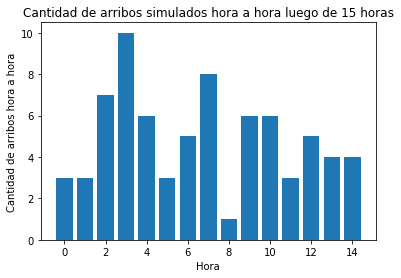

In [52]:
plt.bar(range(0,horas),arribos_horas)
plt.title('Cantidad de arribos simulados hora a hora luego de ' + str(horas) + ' horas')
plt.ylabel('Cantidad de arribos hora a hora')
plt.xlabel('Hora')
plt.show()

Vamos ahora a hacer algunas estadísticas de los tiempos entre arribos simulados y la cantidad de arribos obtenidos como por ejemplo graficar un BoxPlot.

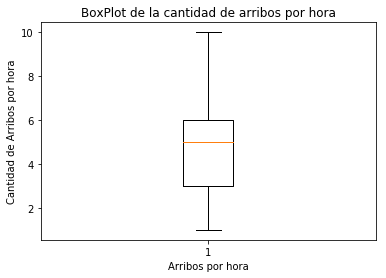

In [53]:
plt.boxplot(arribos_horas)
plt.title('BoxPlot de la cantidad de arribos por hora')
plt.xlabel('Arribos por hora')
plt.ylabel('Cantidad de Arribos por hora')
plt.show()

En el boxplot anterior podemos observar como se distribuye la cantidad de arribos por hora en todo el experimento. Recordar que el BoxPlot indica la ubicación del Quartil 01, el Quartil 03 y la mediana de los datos.

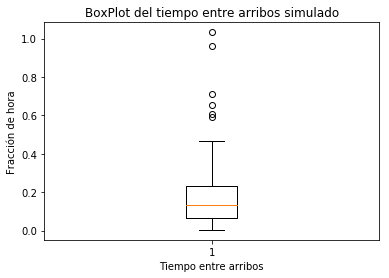

In [54]:
plt.boxplot(tiempos)
plt.title('BoxPlot del tiempo entre arribos simulado')
plt.xlabel('Tiempo entre arribos')
plt.ylabel('Fracción de hora')
plt.show()

Podrá observarse que la mayoría de los datos (entre el Quartil 01 y 03) se concentran cerca de la media y muy pocos datos simulados se encuentran por arriba de lo simulado.